In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('antfile17.csv')

In [3]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

In [7]:
bagging_acc = accuracy_score(y_test, y_pred_bagging)
bagging_cm = confusion_matrix(y_test, y_pred_bagging)
bagging_cr = classification_report(y_test, y_pred_bagging)

In [8]:
print("Bagging Classifier Results:")
print(f"Accuracy: {bagging_acc * 100:.2f}%")
print("Confusion Matrix:\n", bagging_cm)
print("Classification Report:\n", bagging_cr)

Bagging Classifier Results:
Accuracy: 80.36%
Confusion Matrix:
 [[152  14]
 [ 30  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.87       166
           1       0.67      0.48      0.56        58

    accuracy                           0.80       224
   macro avg       0.75      0.70      0.72       224
weighted avg       0.79      0.80      0.79       224



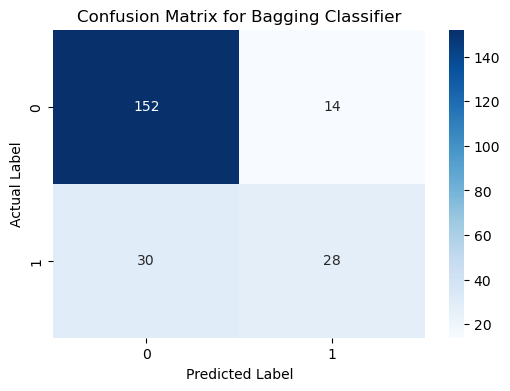

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(bagging_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Bagging Classifier")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

In [11]:
adaboost_acc = accuracy_score(y_test, y_pred_adaboost)
adaboost_cm = confusion_matrix(y_test, y_pred_adaboost)
adaboost_cr = classification_report(y_test, y_pred_adaboost)

In [12]:
print("AdaBoost Classifier Results:")
print(f"Accuracy: {adaboost_acc * 100:.2f}%")
print("Confusion Matrix:\n", adaboost_cm)
print("Classification Report:\n", adaboost_cr)

AdaBoost Classifier Results:
Accuracy: 76.34%
Confusion Matrix:
 [[143  23]
 [ 30  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       166
           1       0.55      0.48      0.51        58

    accuracy                           0.76       224
   macro avg       0.69      0.67      0.68       224
weighted avg       0.75      0.76      0.76       224



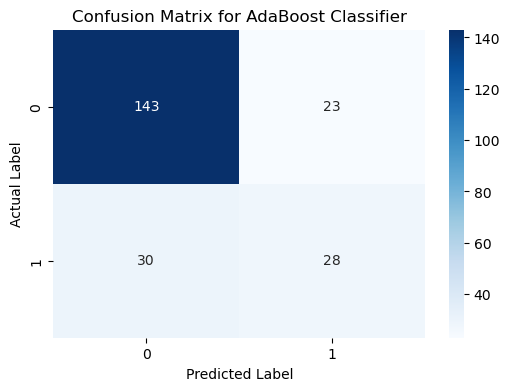

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(adaboost_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()